https://sebastianraschka.com/faq/docs/lda-vs-pca.html

# SVD
[Beatiful Explanation](https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.8-Singular-Value-Decomposition/)

Eigendecomposition can only be performed for square matrices. Other type of matrices that can't be decomposed using eigendecomposition can be decomposed using SVD

![SVD](https://i.imgur.com/l6xQdT6.png)
* U and V are *orthogonal matrices* i.e. $U^{T}$ = $U^{-1}$
* D is a *diagonal matrix*
![dim](https://i.imgur.com/wfThzL9.png)

*The columns of U are called the left-singular vectors of A while the columns of V are the right-singular vectors of A. The values along the diagonal of D are the singular values of A*

>A  is a matrix that represents some linear transformation. This transformation can be decomposed in three sub-transformations: 
1. **rotation** (U) 
2. **re-scaling** (D)
3. **rotation** (V)


To represent the linear transformation associated with matrices we can also draw the unit circle and see how a matrix can transform it. The unit circle represents the coordinates of every unit vectors (vector of length 1)

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image

In [2]:
sns.set_style("darkgrid")

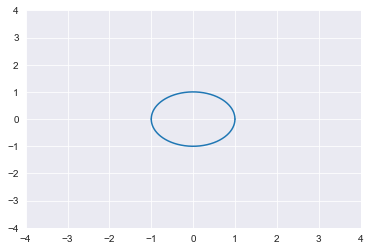

In [3]:
x = np.linspace(-1, 1, 100000)
y = np.sqrt(1-(x**2))
plt.plot(x, y, sns.color_palette().as_hex()[0])
plt.plot(x, -y, sns.color_palette().as_hex()[0])
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.show()

### Diagonal Matrices

Diagonal matrices represent only scaling transformation
\begin{bmatrix} 3 & 0 \\ 0 & 2 \end{bmatrix}

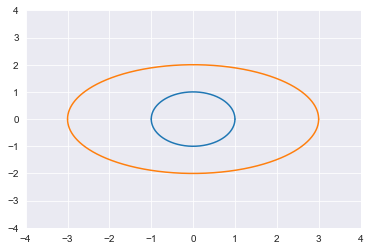

In [4]:
# unit circle
x = np.linspace(-1, 1, 100000)
y = np.sqrt(1-(x**2))
# transformed coordinates
x_hat = 3*x
y_hat = 2*y
# plotting unit circle
plt.plot(x, y, sns.color_palette().as_hex()[0])
plt.plot(x, -y, sns.color_palette().as_hex()[0])
# plotting transformed coordinates
plt.plot(x_hat, y_hat, sns.color_palette().as_hex()[1])
plt.plot(x_hat, -y_hat, sns.color_palette().as_hex()[1])
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.show()

In [5]:
np.sin(np.radians(45))

0.7071067811865475

### Rotation Matrices

Matrices that are not diagonal can produce a rotation
\begin{bmatrix} cos(45) & -sin(45) \\ sin(45) & cos(45 \end{bmatrix}

\begin{bmatrix} 0.707 & -0.707 \\ 0.707 & 0.707 \end{bmatrix}

This matrix will rotate our vectors or matrices counterclockwise through an angle *θ*

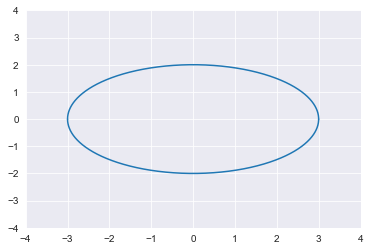

In [6]:
x = np.linspace(-3, 3, 100000)
y = 2*np.sqrt(1-((x/3)**2))
plt.plot(x, y, sns.color_palette().as_hex()[0])
plt.plot(x, -y, sns.color_palette().as_hex()[0])
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.show()

Not taking unit circle on purpose, otherwise the transformed circle will simple overlap the initial circle

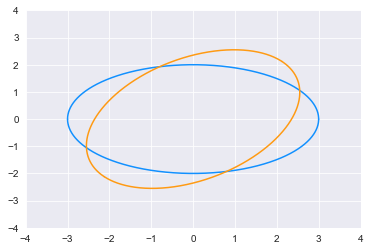

In [7]:
x = np.linspace(-3, 3, 100000)
y = 2*np.sqrt(1-((x/3)**2))

x1 = x*np.cos(np.radians(45)) - y*np.sin(np.radians(45))
y1 = x*np.sin(np.radians(45)) + y*np.cos(np.radians(45))

x1_neg = x*np.cos(np.radians(45)) - -y*np.sin(np.radians(45))
y1_neg = x*np.sin(np.radians(45)) + -y*np.cos(np.radians(45))

u1 = [-2*np.sin(np.radians(45)), 2*np.cos(np.radians(45))]
v1 = [3*np.cos(np.radians(45)), 3*np.sin(np.radians(45))]

plt.plot(x, y, '#1190FF')
plt.plot(x, -y, '#1190FF')

plt.plot(x1, y1, '#FF9A13')
plt.plot(x1_neg, y1_neg, '#FF9A13')

plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.show()

Notice that in the above transformation matrix all the values are same, hence it doesn't produce any scaling effect, only rotation effect.

In [8]:
def plotVectors(vecs, cols, alpha=1):
    """
    Plot set of vectors.

    Parameters
    ----------
    vecs : array-like
        Coordinates of the vectors to plot. Each vectors is in an array. For
        instance: [[1, 3], [2, 2]] can be used to plot 2 vectors.
    cols : array-like
        Colors of the vectors. For instance: ['red', 'blue'] will display the
        first vector in red and the second in blue.
    alpha : float
        Opacity of vectors

    Returns:

    fig : instance of matplotlib.figure.Figure
        The figure of the vectors
    """
    plt.figure()
    plt.axvline(x=0, color='#A9A9A9', zorder=0)
    plt.axhline(y=0, color='#A9A9A9', zorder=0)

    for i in range(len(vecs)):
        x = np.concatenate([[0,0],vecs[i]])
        plt.quiver([x[0]],
                   [x[1]],
                   [x[2]],
                   [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=cols[i],
                   alpha=alpha)

In [9]:
def matrixToPlot(matrix, vectorsCol=['#FF9A13', '#1190FF']):
    """
    Modify the unit circle and basis vector by applying a matrix.
    Visualize the effect of the matrix in 2D.

    Parameters
    ----------
    matrix : array-like
        2D matrix to apply to the unit circle.
    vectorsCol : HEX color code
        Color of the basis vectors

    Returns:

    fig : instance of matplotlib.figure.Figure
        The figure containing modified unit circle and basis vectors.
    """
    # Unit circle
    x = np.linspace(-1, 1, 100000)
    y = np.sqrt(1-(x**2))

    # Modified unit circle (separate negative and positive parts)
    x1 = matrix[0,0]*x + matrix[0,1]*y
    y1 = matrix[1,0]*x + matrix[1,1]*y
    x1_neg = matrix[0,0]*x - matrix[0,1]*y
    y1_neg = matrix[1,0]*x - matrix[1,1]*y

    # Vectors
    u1 = [matrix[0,0],matrix[1,0]]
    v1 = [matrix[0,1],matrix[1,1]]

    plotVectors([u1, v1], cols=[vectorsCol[0], vectorsCol[1]])

    plt.plot(x1, y1, 'g', alpha=0.5)
    plt.plot(x1_neg, y1_neg, 'g', alpha=0.5)

## Decomposition

SVD can be seen as the decomposition of one complex transformation in 3 simpler transformations (a rotation, a scaling and another rotation).

\begin{bmatrix} 3 & 7 \\ 5 & 2 \end{bmatrix}

In [10]:
A = np.array([[3, 7], [5, 2]])

Unit circle:


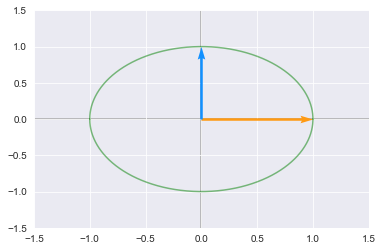

Unit circle transformed by A:


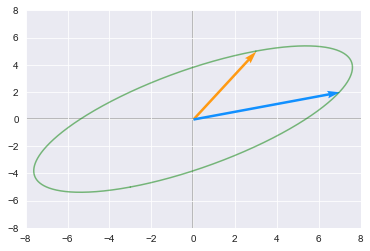

In [11]:
print('Unit circle:')
matrixToPlot(np.array([[1, 0], [0, 1]]))
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.show()

print('Unit circle transformed by A:')
matrixToPlot(A)
plt.xlim(-8, 8)
plt.ylim(-8, 8)
plt.show()

#### Breaking down A using SVD

In [12]:
U, D, Vt = np.linalg.svd(A)

Applying the sub-transformations in reverse order

In [13]:
print("Vt:")
pd.DataFrame(Vt)

Vt:


,0,1
0,-0.594558,-0.804053
1,0.804053,-0.594558


First rotation:


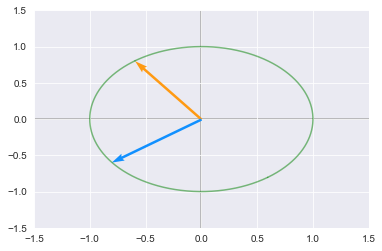

In [15]:
print('First rotation:')
matrixToPlot(Vt)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.show()

In [16]:
print(f"D: {D}")

D: [8.71337969 3.32821489]


Scaling: D.Vt


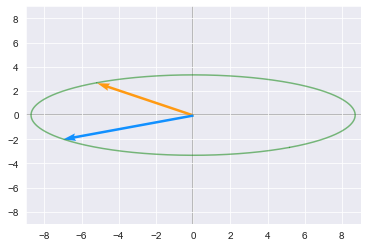

In [17]:
print('Scaling: D.Vt')
matrixToPlot(np.diag(D).dot(Vt))
plt.xlim(-9, 9)
plt.ylim(-9, 9)
plt.show()

In [18]:
print("U")
pd.DataFrame(U)

U


,0,1
0,-0.850651,-0.525731
1,-0.525731,0.850651


Second rotation: U.D.Vt


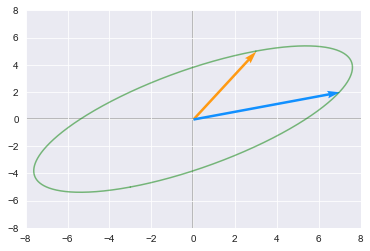

In [19]:
print('Second rotation: U.D.Vt')
matrixToPlot(U.dot(np.diag(D)).dot(Vt))
plt.xlim(-8, 8)
plt.ylim(-8, 8)
plt.show()

In [21]:
U.dot(np.diag(D)).dot(Vt)

array([[3., 7.],
       [5., 2.]])

So, essentially the transformation *A* can be decomposed into 3 sub-transformations - rotation, scaling & rotation

## Interpretation

* U  corresponds to the eigenvectors of $AA^{T}$
* V corresponds to the eigenvectors of $A^{T}A$
* D corresponds to the eigenvalues $AA^{T}$ or $A^{T}A$ which are the same.

The singular values are ordered by descending order. They correspond to a new set of features (that are a linear combination of the original features) with the first feature explaining most of the variance

**Square Matrix**

In [22]:
print(f"U: {U.shape}")
print(f"D: {D.shape}")
print(f"Vt: {Vt.shape}")

U: (2, 2)
D: (2,)
Vt: (2, 2)


In [23]:
print(f"U: \n{U}")
eig_val, eig_vec = np.linalg.eig(A.dot(A.T))
print(f"EigenVector of AAt:\n {eig_vec}")

U: 
[[-0.85065081 -0.52573111]
 [-0.52573111  0.85065081]]
EigenVector of AAt:
 [[ 0.85065081 -0.52573111]
 [ 0.52573111  0.85065081]]


In [24]:
print(f"V: \n{Vt.T}")
eig_val, eig_vec = np.linalg.eig(A.T.dot(A))
print(f"EigenVector of AAt:\n {eig_vec}")

V: 
[[-0.59455781  0.80405286]
 [-0.80405286 -0.59455781]]
EigenVector of AAt:
 [[-0.80405286 -0.59455781]
 [ 0.59455781 -0.80405286]]


Somehow, for square matrix the above phenomenon does not work out

**Rectangular Matrix**

In [31]:
A = np.array([[7, 2], [3, 4], [5, 3]])
U, D, V = np.linalg.svd(A)

In [32]:
print(f"U: {U.shape}")
print(f"D: {D.shape}")
print(f"Vt: {Vt.shape}")

U: (3, 3)
D: (2,)
Vt: (2, 2)


In [33]:
print(f"U: \n{U}")
eig_val, eig_vec = np.linalg.eig(A.dot(A.T))
print(f"EigenVector of AAt:\n {eig_vec}")

U: 
[[-0.69366543  0.59343205 -0.40824829]
 [-0.4427092  -0.79833696 -0.40824829]
 [-0.56818732 -0.10245245  0.81649658]]
EigenVector of AAt:
 [[-0.69366543 -0.59343205 -0.40824829]
 [-0.4427092   0.79833696 -0.40824829]
 [-0.56818732  0.10245245  0.81649658]]


In [34]:
print(f"V: \n{Vt.T}")
eig_val, eig_vec = np.linalg.eig(A.T.dot(A))
print(f"EigenVector of AAt:\n {eig_vec}")

V: 
[[-0.59455781  0.80405286]
 [-0.80405286 -0.59455781]]
EigenVector of AAt:
 [[ 0.88033817 -0.47434662]
 [ 0.47434662  0.88033817]]


The matrix _U_ matches in this case while the value of matrix *V* doesn't match in either case

**The sign difference comes from the fact that eigenvectors are not unique. The linalg functions from Numpy return the normalized eigenvectors. Scaling by -1 doesn’t change their direction or the fact that they are unit vectors.**

## Why $AA^{T}$ or $A^{T}A$

## How to Use?

In [2]:
img = cv2.imread('../data/images/100129.jpg', 0)

In [3]:
img.shape

(268, 182)

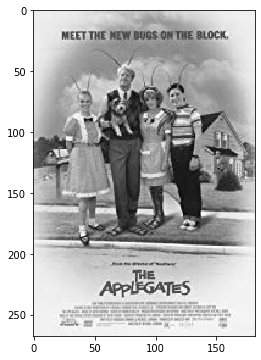

In [4]:
plt.figure(figsize=(9, 6))
plt.imshow(img, cmap='gray')
plt.show()

In [5]:
U, D, V = np.linalg.svd(img)

In [7]:
print(f"U: {U.shape}")
print(f"D: {D.shape}")
print(f"Vt: {V.shape}")

U: (268, 268)
D: (182,)
Vt: (182, 182)


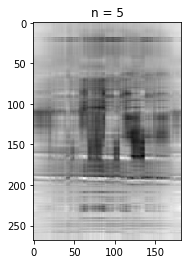

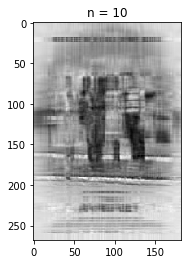

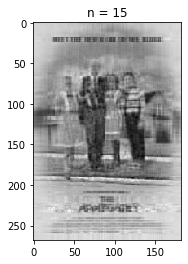

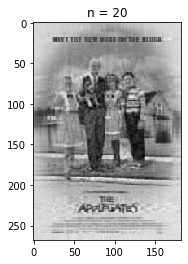

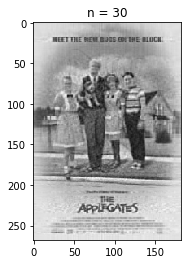

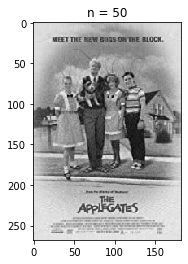

In [8]:
for i in [5, 10, 15, 20, 30, 50]:
    reconstimg = np.matrix(U[:, :i]) * np.diag(D[:i]) * np.matrix(V[:i, :])
    plt.imshow(reconstimg, cmap='gray')
    title = "n = %s" % i
    plt.title(title)
    plt.show()